# Library Import

In [1]:
import pandas as pd # Data processing: CSV file I/O
import sweetviz as sv # Exploratory Data Analysis
import scipy as sc # Sparse matrix
from sklearn.neighbors import NearestNeighbors # Neighbors-based classification and Searches
import random # Random Generation of Test User-Rating Data Dictionary
import json # Well-formatted Dictionary
import statistics # Mean Calculations

# Data Import
Datasets link: https://www.kaggle.com/CooperUnion/anime-recommendations-database

| file | size | rows | columns |
| --- | --- | --- | --- |
| anime.csv | 914kb | 12294 | 7 |
| rating.csv | 106MB | 7813737 | 3 | 

This data set contains information on user preference data from 73,516 users on 12,294 anime.

In [2]:
DIR = 'datasets/'
anime = pd.read_csv(DIR + "anime.csv", dtype= { 'anime_id': int, 'members': int}, encoding='utf-8-sig')
rating = pd.read_csv(DIR + "rating.csv", dtype = int)

# Data Exploration and Analysis

In [3]:
anime.head() # Read first 5 row of anime DataFrame (DF)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating.head() # Read first 5 row of rating DataFrame

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
anime.info() # Detail information of anime DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int32  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 576.4+ KB


In [6]:
rating.isnull().sum() # Find Columns of ratings DF with any missing values

user_id     0
anime_id    0
rating      0
dtype: int64

In [7]:
rating.info() # Detail information of rating DF with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int32
 1   anime_id  int32
 2   rating    int32
dtypes: int32(3)
memory usage: 89.4 MB


In [8]:
anime.isnull().sum() # Find Columns of anime DF with any missing values

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [9]:
len(rating['user_id'].unique()) # number of users

73515

In [10]:
len(anime['anime_id'].unique()) # number of unique animes in anime DF

12294

In [11]:
episodes = pd.to_numeric(anime['episodes'], errors='coerce').fillna(0) # average number of episodes in anime
statistics.mean(episodes.tolist())

12.040100862209208

In [12]:
anime_watched_per_user = rating.groupby('user_id')['rating'].count() # average number of anime rated per user
statistics.mean(anime_watched_per_user.tolist())

106.28765558049378

<AxesSubplot:>

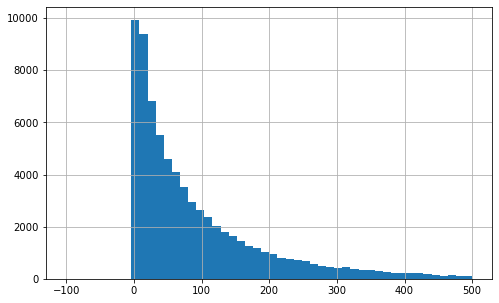

In [13]:
anime_watched_per_user.hist(bins=50, range=(-100,500), figsize=(8,5)) # Histogram on distribution of anime-watch per user

In [14]:
ratings_per_anime = rating.groupby('anime_id')['rating'].count()
statistics.mean(ratings_per_anime.tolist()) #average rating per anime

697.6550892857143

<AxesSubplot:>

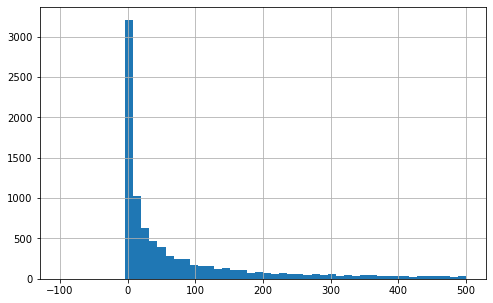

In [15]:
ratings_per_anime.hist(bins=50, range=(-100,500), figsize=(8,5)) # Histogram on distribution of rating per anime

<AxesSubplot:ylabel='Anime Rating'>

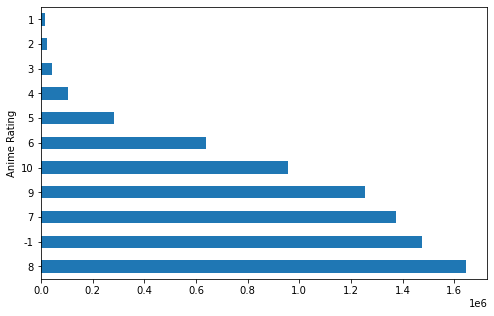

In [16]:
rating.rating.value_counts(sort=True).plot(kind='barh', xlabel = 'Anime Rating', figsize=(8,5)) # rating(1-10) count

<AxesSubplot:ylabel='type'>

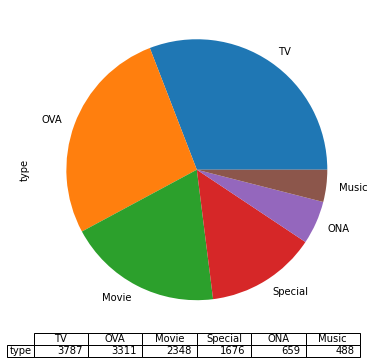

In [17]:
anime.type.value_counts(sort=True).plot(kind='pie', xlabel = 'Type of Anime', table=True, figsize=(6,6)) # Type Count

In [18]:
num_anime_per_genre = {}
for genre_chunk in anime['genre']:
    granular_genre = [x.strip() for x in str(genre_chunk).split(',')]
    for genre in granular_genre:
        if (genre in num_anime_per_genre.keys()):
            num_anime_per_genre[genre] += 1
        else:
            num_anime_per_genre[genre] = 0

<AxesSubplot:ylabel='Genre'>

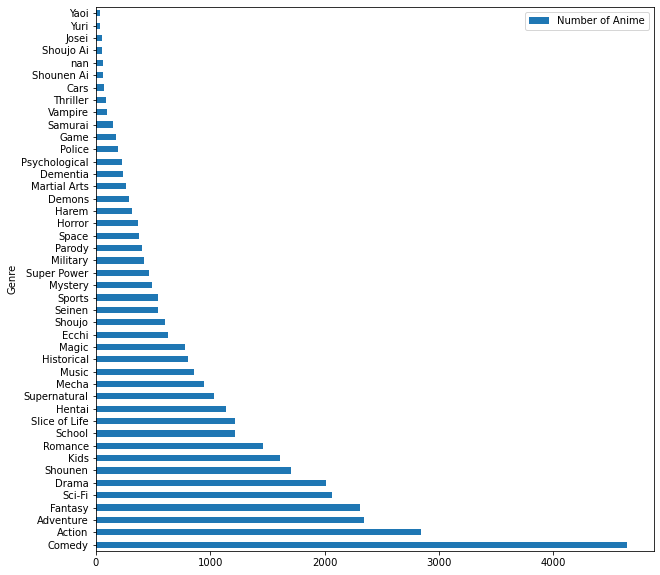

In [19]:
pd.DataFrame(num_anime_per_genre.items(), columns=['Genre', 'Number of Anime']).sort_values(by='Number of Anime', ascending=False).plot(kind='barh', x='Genre', y='Number of Anime', figsize=(10,10)) # Anime per Genre

<AxesSubplot:ylabel='name'>

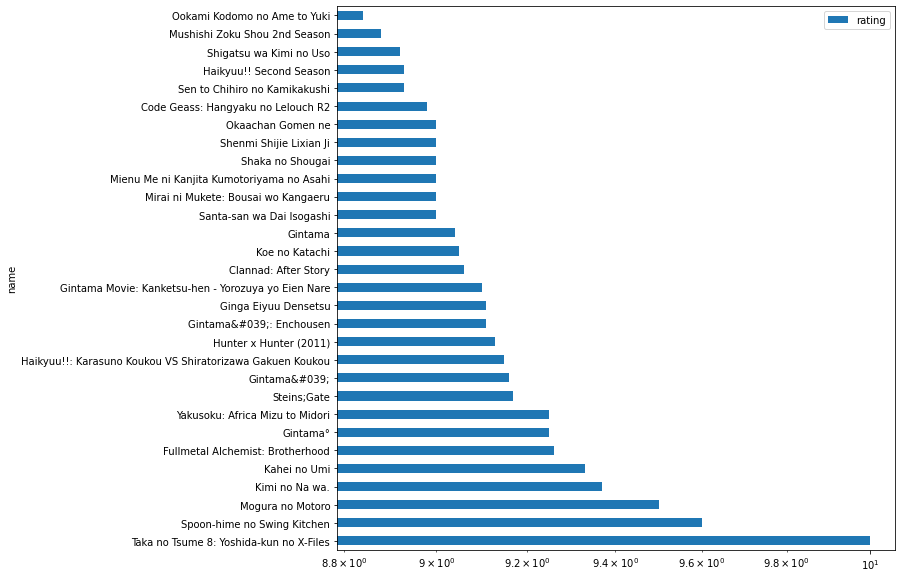

In [20]:
anime.sort_values(by='rating', ascending=False)[0:30].plot(kind='barh', x='name', y='rating', logx=True, figsize=(10,10)) # Top 30 highest-rated Anime

In [ ]:
anime_report = sv.analyze([anime, 'Anime']) # Easy geration of exploratory data analysis report using sweetviz package
anime_report.show_html('anime_report.html', layout='vertical', scale=1.0)

In [ ]:
rating_report = sv.analyze([rating, 'Anime Rating']) 
rating_report.show_html('rating_report.html', layout='vertical', scale=1.0)

In [ ]:
anime_rating_comparison = sv.compare([anime, 'Anime'],[rating, 'Anime Rating'], "anime_id")
anime_rating_comparison.show_html('rating_report.html', layout='vertical', scale=1.0)

# Data Cleaning: rating DF
*rating*(DF) => *rating*(feature) value(1-10): **-1** means the user did not rated even after watching it (anime) and can be considered invaluable/invalid.

In [21]:
anime.dropna(inplace=True, subset=['genre']) # Dropping nulls if they exist

In [22]:
rating = rating[rating.rating != -1] # Removing user_ratings with rating value -1

In [23]:
rating = rating[rating.anime_id.isin(anime['anime_id'])] # Removing ratings unrelated to any anime in anime DF

In [24]:
rating.head() # Cleaned rating DF at a glance

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [25]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337151 entries, 47 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int32
 1   anime_id  int32
 2   rating    int32
dtypes: int32(3)
memory usage: 120.9 MB


# Data Merge: (Anime + Rating) DF
As per the common feature (anime_id), Two Dataframes are merged accordingly.

In [26]:
anime_ = anime[['anime_id', 'name']] # Omiting unnecessary columns from DataFrame
anime_rating_merge = pd.merge(anime_, rating, on='anime_id') # Table Merge

# Pivot and Reshape the Merged DFs
Reshaping/Pivoting a table generates numerous NaN (Not a Number) values. It must be cleaned to avoid exceptions on further processing. Hence the NaN values is replaced by 0.

In [27]:
user_anime_pivot = anime_rating_merge.pivot_table(index = ['user_id'], columns = ['name'], values = 'rating').fillna(0)

In [28]:
user_anime_pivot.info() # Detail information of the User-Anime pivot table

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69600 entries, 1 to 73516
Columns: 9894 entries, &quot;0&quot; to ◯
dtypes: float64(9894)
memory usage: 5.1 GB


In [29]:
user_anime_pivot.tail() # pivot table at a glance

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
73512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# DF to Matrix-Array
Conversion of User-Anime pivot table to a Compressed Sparse Row (CSR) matrix for efficient row(s) calculations.

In [30]:
user_anime_matrix = sc.sparse.csr_matrix(user_anime_pivot.values)

# Matrix-Array fit on KNN model
Instantiating the NearestNeighbors class from the Matrix-Array with Euclidean Distance-Metric for implementing Neighbor searches.

In [31]:
model_knn_euclidean = NearestNeighbors(metric='euclidean', algorithm='brute')
model_knn_euclidean.fit(user_anime_matrix)

NearestNeighbors(algorithm='brute', metric='euclidean')

# Similar User Extraction

In [32]:
seen_anime_ids = []

Retrieve similar users by passing an existing **user_id**

In [75]:
def get_similar_users_by_userid(num_neighbors, user_id):
    global seen_anime_ids
    if user_id != 0:
        seen_anime_ids = rating[rating.user_id == user_id]['anime_id'].tolist() # Assigning a list of anime_ids from rating DF filtered by user_id argument
    user_rating_reshaped = user_anime_pivot.loc[user_id,:].values.reshape(1,-1) # Reshaping the DF row into an Array
    distances, indices = model_knn_euclidean.kneighbors(user_rating_reshaped, n_neighbors = num_neighbors) # Generating nearest neighbors from model_knn and above array as per num_neighbors argument
    distances, user_ids = distances.flatten(), [user_anime_pivot.index[i] for i in indices.flatten()] # un-wraping the nested-lists of distances, indices. Retrieving a list of user_ids as per indices from User-Anime pivot table 
    print(f'Users similar to {user_id}:\n\nSN.\tUser_ID\t\tDistance')
    for i in range(0, len(distances)):
        print(f'{i}\t{user_ids[i]},\t\t{distances.flatten()[i]}')
    return user_ids

In [89]:
user_id = rating.user_id.sample().iloc[0]
similar_user_ids = get_similar_users_by_userid(20, user_id)

Users similar to 36221:

SN.	User_ID		Distance
0	36221,		0.0
1	43850,		67.63135367564367
2	46130,		67.90434448545984
3	69873,		68.4178339323893
4	28498,		68.64400920692205
5	1962,		68.82586723027906
6	72327,		68.85491994040804
7	37919,		69.13031173081747
8	56723,		69.18092222571191
9	48422,		69.22427319950712
10	63974,		69.26759704219572
11	69553,		69.38299503480663
12	47133,		69.46221994724903
13	70406,		69.57010852370435
14	4610,		69.59166616772443
15	46905,		69.62039930939781
16	1920,		69.67065379340143
17	41674,		69.68500556073738
18	33090,		69.6921803361037
19	42278,		69.72804313904126


Retrieve similar users by passing a **dictionary** of <anime_name, rating> pair, faking User rating per anime

In [39]:
def get_similar_users_by_ratings(num_neighbors, anime_ratings: dict):
    global seen_anime_ids
    seen_anime_ids = list(anime_ratings.keys())
    user_anime_pivot.loc[0] = anime_ratings # Inserting the anime ratings in the previous User-Anime pivot table as row with index label 0
    user_anime_pivot.loc[0] = user_anime_pivot.loc[0].fillna(0) # Cleaning NaN values of the above inserted row
    return get_similar_users_by_userid(num_neighbors, 0)

**Anime-Ratings Faker** : Random generation of anime ratings as per num_anime argument

In [103]:
def generate_anime_ratings(num_anime):
    anime_ratings = {}
    anime_collection = anime['name'].tolist()
    rating_collection = [i for i in range(1,11)]
    for i in range(0, num_anime):   
        anime_name = ""
        while(True):            
            anime_name = random.choice(anime_collection)
            if(anime_name not in anime_ratings): break
        anime_ratings[anime_name] = random.choice(rating_collection)
    print(json.dumps(['Randomly Generated Anime-Ratings', anime_ratings], indent = 4),'\n')
    return anime_ratings

In [121]:
r = generate_anime_ratings(21)
similar_user_ids = get_similar_users_by_ratings(20, r)

[
    "Randomly Generated Anime-Ratings",
    {
        "Junjou Romantica Special": 9,
        "Gangsta.": 6,
        "Taimanin Yukikaze": 2,
        "Tora-chan to Hanayome": 6,
        "Date A Live Movie: Mayuri Judgment": 1,
        "Ishida to Asakura": 2,
        "Mahou no Tenshi Creamy Mami: Perfect Memory": 10,
        "Nanmu Ichibyousokusai": 1,
        "Roba Chotto Suneta": 8,
        "Amon: Devilman Mokushiroku": 2,
        "Kamiusagi Rope Specials": 2,
        "Jungle Taitei": 5,
        "Shitcom": 1,
        "Ranma \u00bd: Akumu! Shunmin Kou": 7,
        "Ketsuekigata-kun! 2": 2,
        "Kattobase! Dreamers: Carp Tanjou Monogatari": 6,
        "Salad Juu Yuushi Tomatoman": 1,
        "Kashimashi: Girl Meets Girl": 2,
        "Samurai Girl Real Bout High School": 2,
        "Jinshin Yuugi": 6,
        "Magi: The Labyrinth of Magic": 1
    }
] 

Users similar to 0:

SN.	User_ID		Distance
0	46734,		17.88854381999832
1	45008,		18.303005217723125
2	39396,		18.894443627691185
3	71

# Anime Recommendations Generation using Similar Users

In [122]:
ratings_per_similar_user = rating[rating.user_id.isin(similar_user_ids) & ~rating.anime_id.isin(seen_anime_ids)] # Extract ratings of similar user from rating DF having unseen anime_id
anime_rating_group = ratings_per_similar_user[['anime_id', 'rating']].groupby('anime_id', sort=False, as_index=False).mean() # Grouping anime_id and calculating average rating per anime from similar user's rating.
anime_rating_group.sort_values(by='rating', ascending=False, inplace=True) # Sort the above DF by rating (feature) descendingly
anime_recommendations = pd.merge(anime_rating_group['anime_id'], anime, on='anime_id')

C:\Users\bisha\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [123]:
def get_anime_recommendations(num_anime): # Generates a fixed number of anime recommendations as per num_anime argument
    return anime_recommendations[0:num_anime]

In [124]:
get_anime_recommendations(20)

,anime_id,name,genre,type,episodes,rating,members
0,1572,Jungle Taitei,"Adventure, Kids, Shounen",TV,52,6.69,3067
1,25183,Gangsta.,"Action, Drama, Seinen",TV,12,7.50,210752
2,19315,Pupa,"Fantasy, Horror, Psychological",TV,12,3.82,83652
3,25567,DRAMAtical Murder OVA: Data_xx_Transitory,"Drama, Psychological, Sci-Fi, Shounen Ai",Special,1,6.23,12469
4,27899,Tokyo Ghoul √A,"Action, Drama, Horror, Mystery, Psychological,...",TV,12,7.52,408357
5,133,Green Green,"Comedy, Ecchi, Romance, School, Slice of Life",TV,12,6.44,80562
6,2476,School Days,"Drama, Harem, Romance, School",TV,12,6.17,279183
7,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
8,3287,Tenkuu Danzai Skelter+Heaven,"Mecha, Sci-Fi",OVA,1,2.00,7680
9,413,Hametsu no Mars,"Horror, Sci-Fi",OVA,1,2.37,27557
